## Ridge

Analyze data boston dataset from sklearn
1. Apply Ridge Regression
    - Target : target (house price)
    - Features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
2. Using different alpha (100000,10000,1000,100,10,1,0.1,0.01,0.001) <br> Validate the model using mse in 20% testing data and 80% training data
4. Compare mse obtained from training data and testing data

In [1]:
# dataframe
import pandas as pd
import numpy as np

# data
from sklearn.datasets import load_boston

# preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# pd.DataFrame.from_dict(data=boston)
df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])
df['y'] = pd.Series(boston['target'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Ket :
1. CRIM : tingkat kejahatan
2. ZN : proporsi tempat tinggal / bangunan yang luasnya > 25000 kaki persegi
3. INDUS : proporsi lahan hektar yg termasuk bisini non retail
4. CHAS : apakah pemukiman dekat dengan sungai
5. NOX : konsentrasi Nitrogen Oksida di udara
6. RM : rata2 ruangan dari setiap rumah yang ada dipemukiman
7. AGE : proporsi hunian yang terisi huniannya dibangun sebelum thn 1940
8. DIS : rata2 jarak hunian terhadap 5 pusat perkantoran di BOSTON
9. RAD : tingkat aksesibilitas terhadap jalan raya/jalan TOL
10. TAX : tarif pajak properti
11. PTRATIO : rasio antara siswa dan guru
12. B : mengindikasikan seberapa banyak orang kulit hitam di pemukiman
13. LSTAT : mengindikasikan ada berapa banyak masyarakat kelas bawah
14. MEDV : kisaran harga rumah di pemukiman ($1000) dlm median

In [6]:
# split data
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1899
)

In [48]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

df = sns.load_dataset(name='mpg')

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [64]:
# df['mpg'] = pd.DataFrame({'1','2','3','4','5','6','7','8','9'})
for i in range(len(df['mpg'])):
    df['mpg'][i] = np.random.randint(1,10)

len(df['mpg'].unique())

<ipython-input-64-68d877d2052e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg'][i] = np.random.randint(1,10)


9

In [65]:
encoder = OneHotEncoder()

len(df['mpg'].unique())

9

In [66]:
mpg_train = np.array(df['mpg']).reshape(-1,1)

In [67]:
mpg_train_encoded = encoder.fit_transform(mpg_train)

In [68]:
c=mpg_train_encoded.tocoo()

In [69]:
mpg_train_encoded.shape[1]

9

In [ ]:
df

In [7]:
# scaling
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
# Ridge
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
test_mse = []
train_mse = []
score = 1000
best_alpha = 0

for i in hyperparam_alpha:
#     training model
    ridge = Ridge(alpha=i)
    ridge.fit(x_train_scaled,y_train)
    
    y_train_pred = ridge.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train_mse.append(mse_train)
    
    y_test_pred = ridge.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test_mse.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
        
print("best alpha {}, accuracies {}".format(best_alpha,score))
test_mse

best alpha 1, accuracies 27.686878880361682


[83.85880100865704,
 82.9692771903585,
 75.67798038205832,
 51.42824466293076,
 28.878246098825723,
 27.686878880361682,
 28.627257443265673,
 28.761537265595962,
 28.775541748326827,
 28.7769482368374,
 28.777088946382122,
 28.777103017943812]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


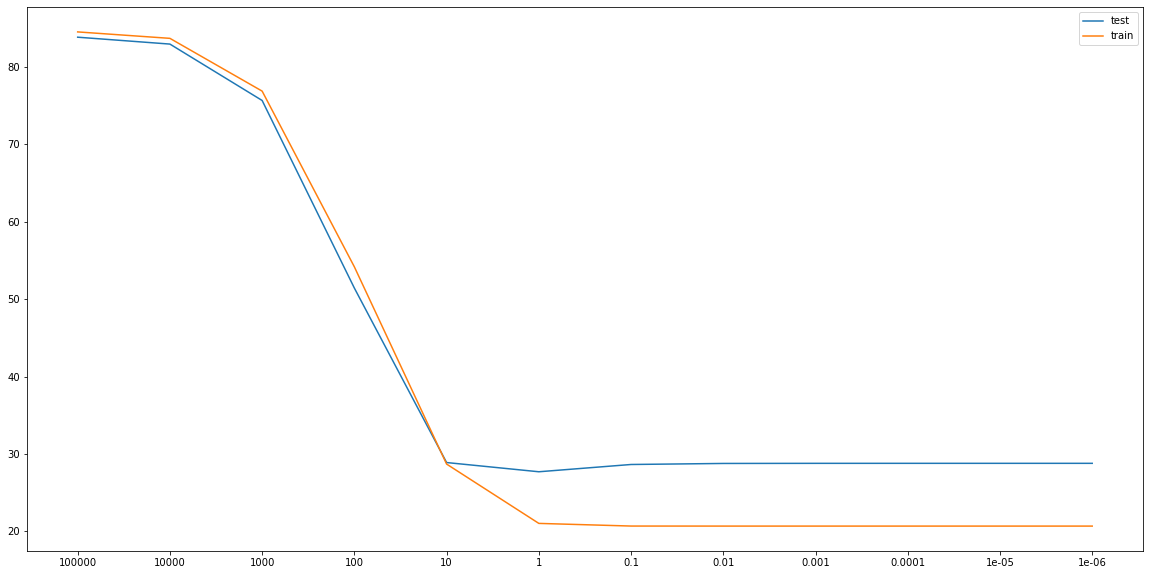

In [29]:
length = range (len(hyperparam_alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, test_mse)
sns.lineplot(length, train_mse)
plt.legend(['test','train'])
plt.xticks(length, hyperparam_alpha)
plt.show()

In [27]:
pd.DataFrame(
    {    
        'alpha':hyperparam_alpha,
        'score train': train_mse,
        'score test':test_mse
    })

,alpha,score train,score test
0,100000.000000,84.542598,83.858801
1,10000.000000,83.709846,82.969277
2,1000.000000,76.889003,75.677980
3,100.000000,54.172112,51.428245
4,10.000000,28.680369,28.878246
5,1.000000,21.012610,27.686879
6,0.100000,20.669433,28.627257
7,0.010000,20.664355,28.761537
8,0.001000,20.664301,28.775542
9,0.000100,20.664301,28.776948


## Lasso

Analyze data boston dataset from sklearn
1. Apply Lasso regression
    - Target : target (house price)
    - Features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
2. Using different alpha (...,1000,100,10,1,0.1,0.01,..) <br> validate the model using mse in 20% testing data and 80% training data
3. Compare mse obtained from training data and testing data

In [31]:
# Lasso
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
test_mse = []
train_mse = []
score = 1000
best_alpha = 0

for i in hyperparam_alpha:
#     training model
    lasso = Lasso(alpha=i)
    lasso.fit(x_train_scaled,y_train)
    
    y_train_pred = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train_mse.append(mse_train)
    
    y_test_pred = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test_mse.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
        
print("best alpha {}, accuracies {}".format(best_alpha,score))
test_mse

best alpha 0.001, accuracies 28.770786557661072


[83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 63.08129127931523,
 31.6606293569828,
 28.859161383602366,
 28.770786557661072,
 28.776327959979042,
 28.7770254100128,
 28.777096641025146]

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


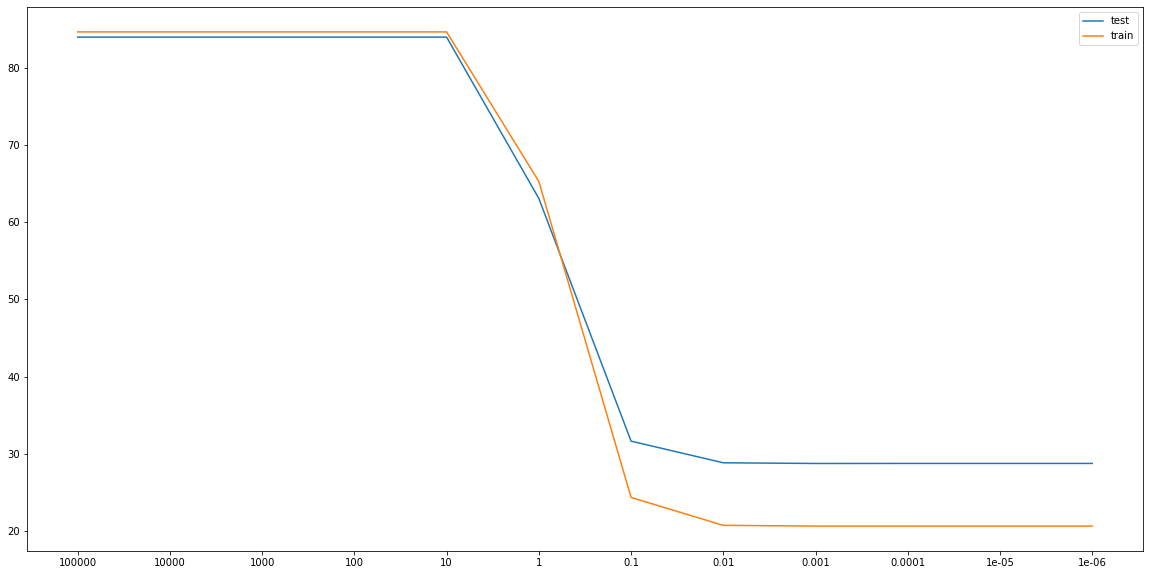

In [32]:
length = range (len(hyperparam_alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, test_mse)
sns.lineplot(length, train_mse)
plt.legend(['test','train'])
plt.xticks(length, hyperparam_alpha)
plt.show()

In [ ]:
alpha besar > 0.001 model underfitting krn test maupun train sama2 buruk
alpha optimal = 0.001